In [1]:
!pip uninstall opencv-contrib-python opencv-python -y

Found existing installation: opencv-contrib-python 4.5.4.60
Uninstalling opencv-contrib-python-4.5.4.60:
  Successfully uninstalled opencv-contrib-python-4.5.4.60
Found existing installation: opencv-python 4.5.4.60
Uninstalling opencv-python-4.5.4.60:
  Successfully uninstalled opencv-python-4.5.4.60


In [2]:
!pip install opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 12.5 MB/s eta 0:00:00


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob


In [4]:
IMAGES = glob.glob("../input/oil-spill-dataset/oil_spill_dataset/images/*")

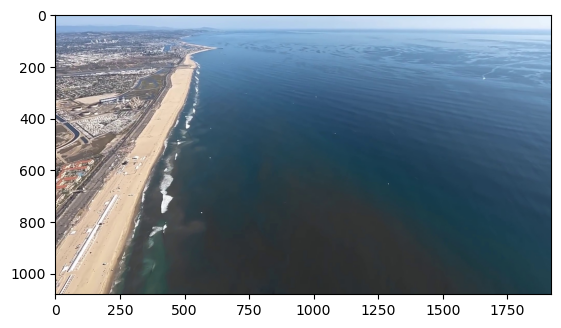

In [5]:
img = cv2.imread(IMAGES[0])
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_test)

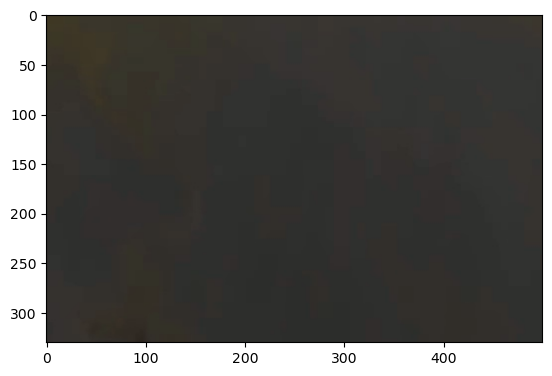

In [6]:
# обозначаем пятно
im = img[750:1080,750:1250]
plt.imshow(im)

In [7]:
train_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
train_image_h, train_image_w = train_hsv.shape[:2]
train_image_area = train_image_h * train_image_w
full_image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
train_imagehist = cv2.calcHist([train_hsv], [0, 1], None, [180, 256], [0, 180, 0,
256])

In [8]:
backprojection_map = cv2.calcBackProject(
[full_image_hsv], [0, 1], train_imagehist, [0, 180, 0, 256], scale=1
)
# Переведем эти значения в вероятности
backprojection_map = backprojection_map.astype(np.float32)
backprojection_map /= train_image_area

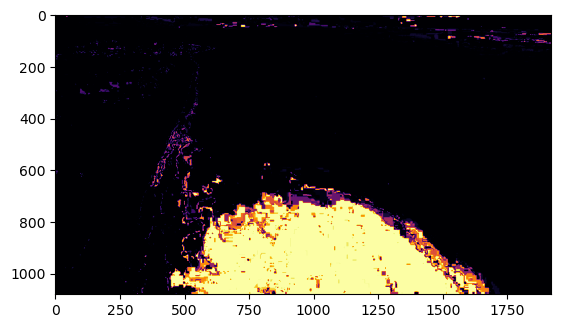

In [9]:
plt.imshow(backprojection_map, cmap="inferno")

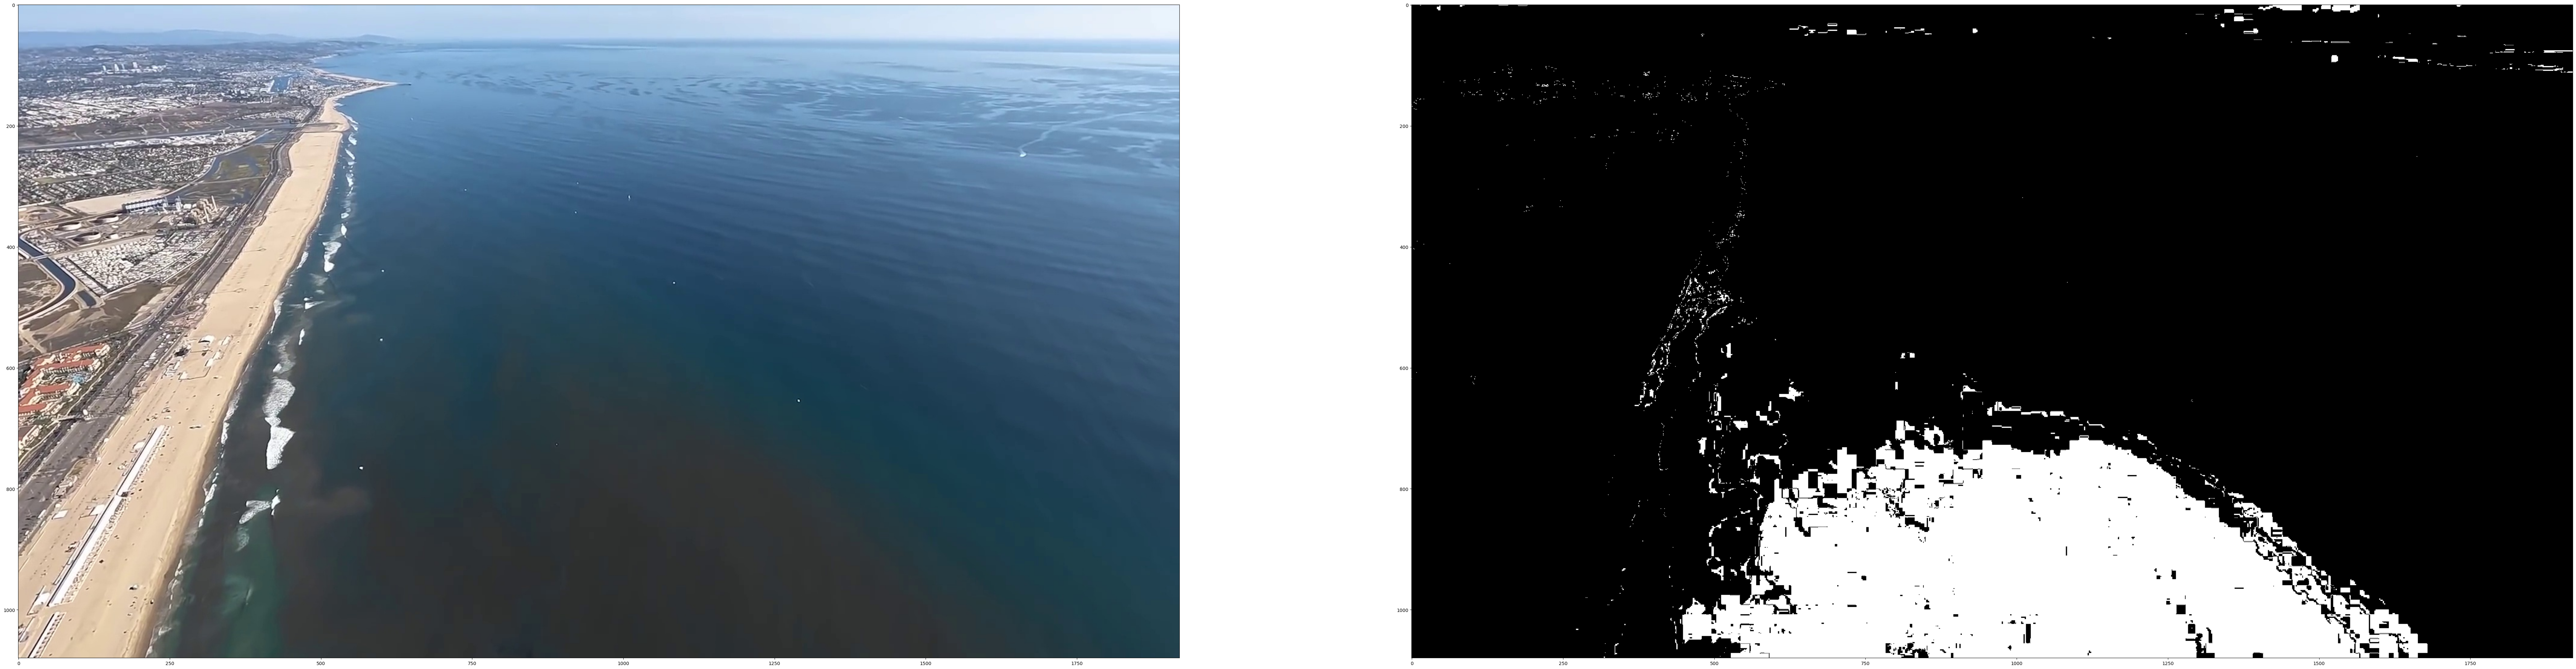

In [10]:
threshold = 0.001
full_image_rgb = img_test
mask = backprojection_map > threshold
masked_image = np.copy(full_image_rgb)
masked_image[mask == 0] = [0, 0, 0]
masked_image[mask != 0] = [255, 255, 255]
fig, (image1_axes, image2_axes) = plt.subplots(1, 2, figsize=(100, 50))
image1_axes.imshow(full_image_rgb)
image2_axes.imshow(masked_image)

### Размытие по Гауссу 

In [11]:
def get_masked_image(img_test2):
    train_hsv = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    train_image_h, train_image_w = train_hsv.shape[:2]
    train_image_area = train_image_h * train_image_w
    full_image_hsv = cv2.cvtColor(img_test2, cv2.COLOR_RGB2HSV)
    train_imagehist = cv2.calcHist([train_hsv], [0, 1], None, [180, 256], [0, 180, 0,
    256])
    backprojection_map = cv2.calcBackProject(
    [full_image_hsv], [0, 1], train_imagehist, [0, 180, 0, 256], scale=1
    )
    backprojection_map = backprojection_map.astype(np.float32)
    backprojection_map /= train_image_area
    threshold = 0.001
    full_image_rgb = img_test2
    mask = backprojection_map > threshold
    masked_image = np.copy(full_image_rgb)
    masked_image[mask == 0] = [0, 0, 0]
    masked_image[mask != 0] = [255, 255, 255]
    return masked_image



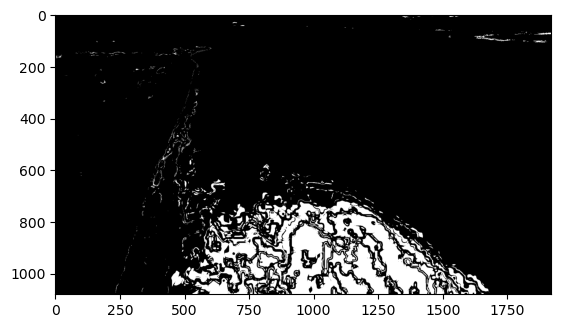

In [12]:
blur = cv2.GaussianBlur(img_test,(25,25),0)
blur_seg = get_masked_image(blur)
plt.imshow(blur_seg)

In [13]:
blurG = cv2.cvtColor(blur_seg, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(blurG, 40, 80, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
img_con = img_test.copy()

areas = []
for cont in contours:
    area=cv2.contourArea(cont)
    peri = cv2.arcLength(cont, True)
    eps = 0.0001
    if area>350:
        approx = cv2.approxPolyDP(cont, eps * peri, True)
        areas.append(approx)
        cv2.drawContours(img_con,approx,-1,(0,255,0),2)

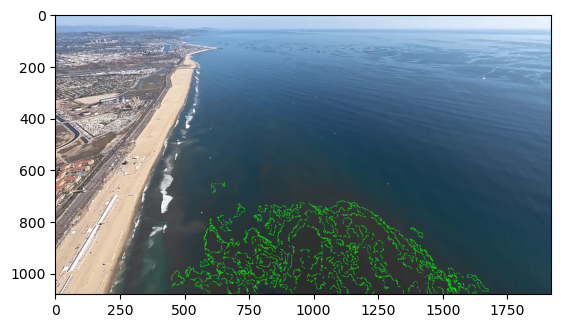

In [15]:
plt.imshow(img_con)

### Создадим изображение с мозаикой нефтяных пятен



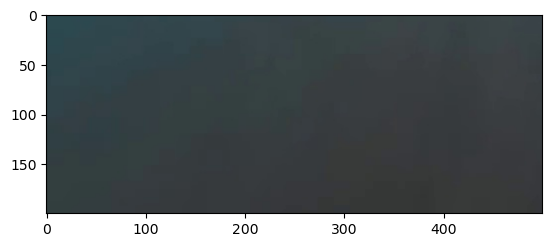

In [16]:
img = cv2.imread(IMAGES[110])
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
first = img_test[600:800, 750:1250]
plt.imshow(first)

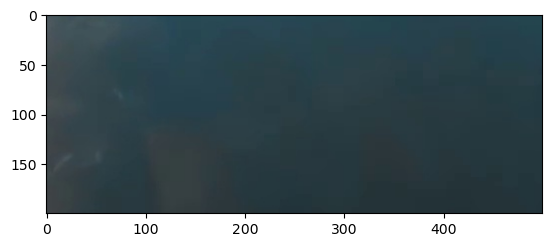

In [17]:
img = cv2.imread(IMAGES[210])
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
second = img_test[600:800, 500:1000]
plt.imshow(second)

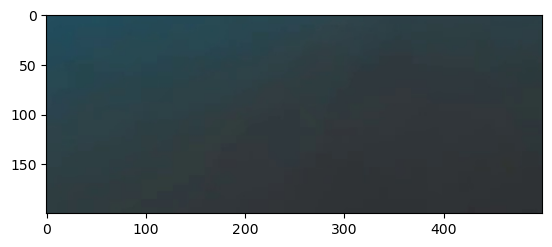

In [18]:
img = cv2.imread(IMAGES[10])
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
third = img_test[550:750, 800:1300]
plt.imshow(third)

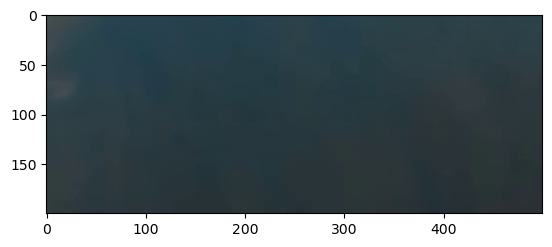

In [19]:
img = cv2.imread(IMAGES[20])
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
forth = img_test[580:780, 500:1000]
plt.imshow(forth)

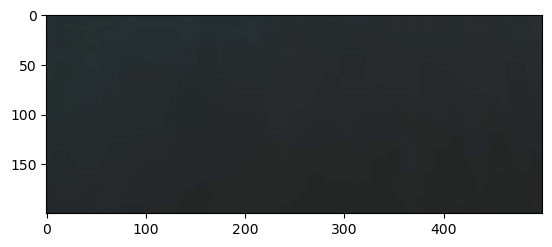

In [20]:
pat = "../input/oil-spill-dataset/oil_spill_dataset/images/4944.jpg"
img = cv2.imread(pat)
img_test = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fifth = img_test[800:1000, 600:1100]
plt.imshow(fifth)

In [21]:
im_train = cv2.vconcat([first,second,third,forth,fifth])

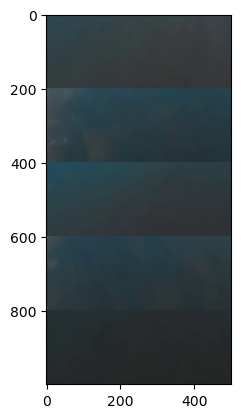

In [22]:
plt.imshow(im_train)

In [23]:
def get_masked_image(img_test2):
    train_hsv = cv2.cvtColor(im_train, cv2.COLOR_BGR2HSV)
    train_image_h, train_image_w = train_hsv.shape[:2]
    train_image_area = train_image_h * train_image_w
    full_image_hsv = cv2.cvtColor(img_test2, cv2.COLOR_RGB2HSV)
    train_imagehist = cv2.calcHist([train_hsv], [0, 1], None, [180, 256], [0, 180, 0,
    256])
    backprojection_map = cv2.calcBackProject(
    [full_image_hsv], [0, 1], train_imagehist, [0, 180, 0, 256], scale=1
    )
    backprojection_map = backprojection_map.astype(np.float32)
    backprojection_map /= train_image_area
    threshold = 0.0001
    full_image_rgb = img_test2
    mask = backprojection_map > threshold
    masked_image = np.copy(full_image_rgb)
    masked_image[mask == 0] = [0, 0, 0]
    masked_image[mask != 0] = [255, 255, 255]
    return masked_image

## Download labels

In [24]:
import json 
import requests
import shutil

data = json.load(open('../input/oil-spill-dataset/oil_spill_dataset/labels.json'))
!mkdir bitmaps

In [25]:
TARGET = './bitmaps'
for x,y in enumerate(data['dataset']['samples']):
    name = data['dataset']['samples'][x]['name'][:-4] + '.png'
    url = data['dataset']['samples'][x]['labels']['ground-truth']['attributes']['segmentation_bitmap']['url']
    response = requests.get(url, stream=True)
    with open(os.path.join(TARGET, name), 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response


In [26]:
data['dataset']['samples'][0]['name']

'4944.jpg'

In [27]:
t = '4944.png'
TARGET = './bitmaps'
path_t = os.path.join(TARGET, t)
bit = cv2.imread(path_t)

In [28]:
stencil = np.zeros(bit.shape).astype(bit.dtype)
color = [255, 255, 255]
pix = np.array([x for x in zip(np.where(bit != [0,0,0])[1], np.where(bit != [0,0,0])[0])])
cv2.fillPoly(stencil, [pix], color)


array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

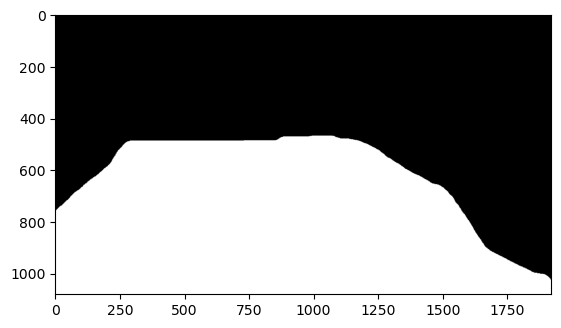

In [29]:
plt.imshow(stencil)

In [30]:
orig_t = cv2.imread("../input/oil-spill-dataset/oil_spill_dataset/images/4944.jpg")
#orig_t = cv2.cvtColor(orig_t, cv2.COLOR_BGR2RGB)
mask_orig = get_masked_image(orig_t)
plt.imshow(mask_orig)

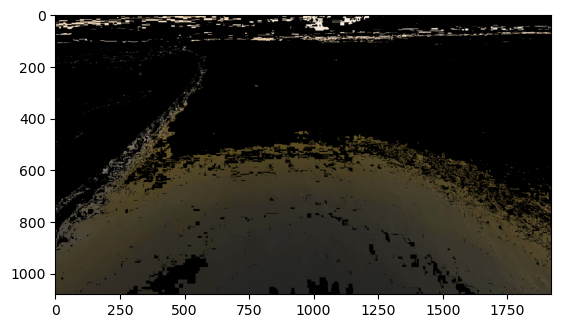

In [31]:
res = cv2.bitwise_and(orig_t, mask_orig)
plt.imshow(res)

## Test

In [32]:
def get_masked_image(img_test2):
    train_hsv = cv2.cvtColor(im_train, cv2.COLOR_BGR2HSV)
    train_image_h, train_image_w = train_hsv.shape[:2]
    train_image_area = train_image_h * train_image_w
    full_image_hsv = cv2.cvtColor(img_test2, cv2.COLOR_RGB2HSV)
    train_imagehist = cv2.calcHist([train_hsv], [0, 1], None, [180, 256], [0, 180, 0,
    256])
    backprojection_map = cv2.calcBackProject(
    [full_image_hsv], [0, 1], train_imagehist, [0, 180, 0, 256], scale=1
    )
    backprojection_map = backprojection_map.astype(np.float32)
    backprojection_map /= train_image_area
    threshold = 0.0001
    full_image_rgb = img_test2
    mask = backprojection_map > threshold
    masked_image = np.copy(full_image_rgb)
    masked_image[mask == 0] = [0, 0, 0]
    masked_image[mask != 0] = [255, 255, 255]
    return masked_image

def sort_cont(cnts):
    areas = []
    for cont in cnts:
        area=cv2.contourArea(cont)
        peri = cv2.arcLength(cont, True)
        eps = 0.0001
        if area>200:
            approx = cv2.approxPolyDP(cont, eps * peri, True)
            areas.append(approx)
    return sorted(areas,key = lambda x: len(x), reverse = True)[0]
    

def get_rec_coord(img):
    orig_t = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mask_orig = get_masked_image(img)
    mg = cv2.cvtColor(mask_orig, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(mg, 200, 256, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    biggest = sort_cont(contours)
    x,y,w,h = cv2.boundingRect(biggest)
    return x,y,w,h
    

def bitmap_coord(img):
    proba = np.zeros(img.shape).astype(img.dtype)
    color = [255, 255, 255]
    pix = np.array([x for x in zip(np.where(img != [0,0,0])[1], np.where(img != [0,0,0])[0])])
    cv2.fillPoly(proba, [pix], color)
    img = cv2.cvtColor(proba, cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img, 240, 256, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = sorted(contours, key = lambda x: len(x), reverse = True)
    x,y,w,h = cv2.boundingRect(cnt[0])
    return x,y,w,h

def bitmap_mask(img):
    proba = np.zeros(img.shape).astype(img.dtype)
    color = [255, 255, 255]
    pix = np.array([x for x in zip(np.where(img != [0,0,0])[1], np.where(img != [0,0,0])[0])])
    cv2.fillPoly(proba, [pix], color)
    return proba

def IoU(res1,res2):
    intersection = np.logical_and(res1, res2)
    union = np.logical_or(res1, res2)
    return np.sum(intersection) / np.sum(union)

def prepare_img(x,y,w,h, img):
    bb_points = [(x,y),(x+w,y),(x+w, y+h),(x,y+h)]
    st = np.zeros(img.shape).astype(img.dtype)
    contours = [np.array(bb_points)]
    color = [255, 255, 255]
    cv2.fillPoly(st, contours, color)
    res = cv2.bitwise_and(img, st)
    return res
    

In [33]:
ious = []

for path in IMAGES:
    name = path.split('/')[-1][:-4]
    path_bit = f'./bitmaps/{name}.png'
    img1 = cv2.imread(path)
    img2 = cv2.imread(path_bit)
    try:
        x1,y1,w1,h1 = get_rec_coord(img1)
        x2,y2,w2,h2 = bitmap_coord(img2)
        res1 = prepare_img(x1,y1,w1,h1, img1)
        res2 = prepare_img(x2,y2,w2,h2, img1)
        met = IoU(res1,res2)
    except Exception:
        continue
    ious.append(met)
    

In [34]:
print('Mean IoU is ', np.mean(ious))
print('Max IoU is ', np.max(ious))
print('Min IoU is ', np.min(ious))

Mean IoU is  0.6132617430571741
Max IoU is  0.9896603976998943
Min IoU is  0.0


In [35]:
import random

In [36]:
!pip install natsort

In [37]:
from natsort import natsorted

tests = random.sample(IMAGES, 9)
tests = natsorted(tests)


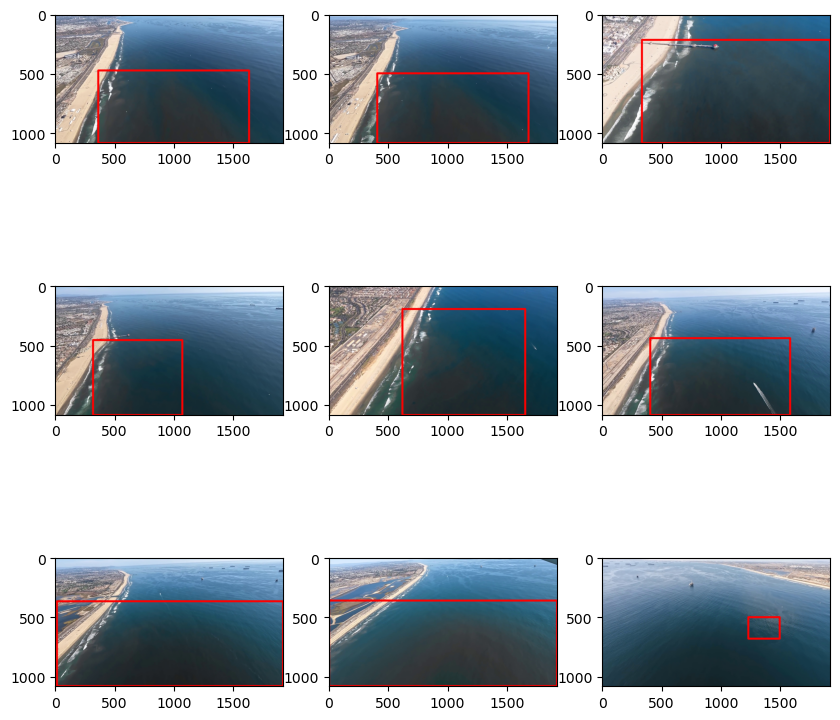

In [38]:

store = []
fig, axs = plt.subplots(3, 3,figsize=(10, 10))

for i in range(3):
    for j in range(3):
        image = cv2.imread(tests.pop(-1))
        x1,y1,w1,h1 = get_rec_coord(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        cv2.rectangle(image, (x1,y1),(x1+w1,y1+h1), (255,0,0), 15)
        store.append(axs[i, j].imshow(image))


    
    
    

## Test with Gauss Blur

In [39]:
ious_gb = []
gauss_kernels = [5,15,25,35,45]

for n,g in enumerate(gauss_kernels):
    ious_gb.append([])
    for path in IMAGES:
        name = path.split('/')[-1][:-4]
        path_bit = f'./bitmaps/{name}.png'
        img1 = cv2.imread(path)
        blur = cv2.GaussianBlur(img1,(g,g),0)
        img2 = cv2.imread(path_bit)
        try:
            x1,y1,w1,h1 = get_rec_coord(blur)
            x2,y2,w2,h2 = bitmap_coord(img2)
            res1 = prepare_img(x1,y1,w1,h1, img1)
            res2 = prepare_img(x2,y2,w2,h2, img1)
            met = IoU(res1,res2)
        except Exception:
            continue
        ious_gb[n].append(met)

In [40]:
mean_gauss = [np.mean(g) for g in ious_gb]
max_gauss = [np.max(g) for g in ious_gb]
min_gauss = [np.min(g) for g in ious_gb]

In [41]:
import pandas as pd

In [42]:
df = pd.DataFrame(data = {'MeanIOU':mean_gauss,'MaxIOU':max_gauss,'MinIOU':min_gauss})
df.set_index(np.array([str(x) for x in gauss_kernels]))
df

MeanIOU    MaxIOU    MinIOU
0  0.600475  0.997191  0.018020
1  0.579392  0.987483  0.018795
2  0.577042  0.990553  0.009770
3  0.578821  0.991892  0.009481
4  0.550477  0.991892  0.011844

## Test with Superpixels

In [43]:
def get_superpixel_map(full_image_rgb, block):
    full_image_rgb = cv2.cvtColor(full_image_rgb, cv2.COLOR_BGR2RGB)
    block_size_pixels = block
    iter_num = 10
    enforce_size_percents = 10
    image_LAB = full_image_rgb
    slic_obj = cv2.ximgproc.createSuperpixelSLIC(
    image=image_LAB,
    algorithm=cv2.ximgproc.SLIC,
    region_size=block_size_pixels,
    )
    slic_obj.iterate(iter_num)
    slic_obj.enforceLabelConnectivity(enforce_size_percents)
    label_map = slic_obj.getLabels()
    superpixels_num = slic_obj.getNumberOfSuperpixels()
    superpixel_processed_image = np.zeros(image_LAB.shape, dtype=full_image_rgb.dtype)
    image_RGB = full_image_rgb
    for superpixel_num in range(superpixels_num):
        superpixel_mask = label_map == superpixel_num
        original_image_values = image_RGB[superpixel_mask]
        mean_superpxixel_color = np.mean(original_image_values, axis=0).astype(full_image_rgb.dtype)
        superpixel_processed_image[superpixel_mask] = mean_superpxixel_color
    return superpixel_processed_image

In [44]:
ious_super = []
super_blocks = [40,50]

for n,g in enumerate(super_blocks):
    ious_super.append([])
    for path in IMAGES:
        name = path.split('/')[-1][:-4]
        path_bit = f'./bitmaps/{name}.png'
        img1 = cv2.imread(path)
        img1 = get_superpixel_map(img1, g)
        img2 = cv2.imread(path_bit)
        try:
            x1,y1,w1,h1 = get_rec_coord(blur)
            x2,y2,w2,h2 = bitmap_coord(img2)
            res1 = prepare_img(x1,y1,w1,h1, img1)
            res2 = prepare_img(x2,y2,w2,h2, img1)
            met = IoU(res1,res2)
        except Exception:
            continue
        ious_super[n].append(met)


In [45]:
mean_super = [np.mean(g) for g in ious_super]
max_super = [np.max(g) for g in ious_super]
min_super = [np.min(g) for g in ious_super]

In [46]:
df = pd.DataFrame(data = {'MeanIOU':mean_super,'MaxIOU':max_super,'MinIOU':min_super})
df.set_index(np.array([str(x) for x in super_blocks]))
df

MeanIOU    MaxIOU    MinIOU
0  0.739543  0.974111  0.322575
1  0.739542  0.974111  0.322270